In [1]:
path = r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\DataAnalyst.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv(path)

In [4]:
cols = [i.lower() for i in data.columns]

In [5]:
data.columns = cols

In [23]:
data.head()

,unnamed: 0,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,easy apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE


In [7]:
outcome = ['salary estimate']  #  Needed data
color = ['black','red','green','gold']

In [204]:
def findRelevantDataColumns():
    
    time = []
    rel  = []
    unrel= []
    cont = []
    
    for i in data.columns:
        
        if type(data[i][0]) == str:
        
            if ''.join(i).lower() in "month dat dayinmonth dayinweek year date exactdate".split() :
                time.append(i)
            elif len(data[i].value_counts()) <30:
                rel.append(i)
            else:
                unrel.append(i)
        
        else:
            cont.append(i)
    
    if len(data.columns) < 25:
        print(time,rel,unrel,cont,sep = '\n')
        return time,rel,unrel,cont

In [205]:
time,rel,unrel,cont = findRelevantDataColumns()

[]
['size', 'type of ownership', 'sector', 'revenue', 'easy apply']
['job title', 'job description', 'company name', 'location', 'headquarters', 'industry', 'competitors']
['unnamed: 0', 'salary estimate', 'rating', 'founded', 'monthly salary in shekels']


In [46]:
for i in rel:
    print(i,len (data[i].value_counts()))

size 9
type of ownership 15
sector 25
revenue 14
easy apply 2


In [51]:
for i in unrel:
    print(i,len (data[i].value_counts()))

job title 1272
salary estimate 90
job description 2253
company name 1513
location 253
headquarters 483
industry 89
competitors 291


In [69]:
for i in rel:
      print(data[i].value_counts(),'\n\n')

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: size, dtype: int64 


Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: type of ownership, dtype: int64 


Information Technology                570
Business Services        

In [10]:
def extract(val):
    
    val = val.split()[0]
    val = val.replace('$','').replace('K','')
    val = val.split('-')
    val = int(val[0])+int(val[1])/2*1000
    return val

data[outcome[0]] = data[outcome[0]].apply(extract)

ValueError: invalid literal for int() with base 10: ''

In [146]:
data[outcome[0]].value_counts()

38042.0    57
39041.0    57
43050.0    41
33535.0    33
46558.0    31
           ..
29531.0     4
33536.0     3
38543.0     3
40547.0     3
35057.0     2
Name: salary estimate, Length: 89, dtype: int64

In [11]:
falseData =  data[data[outcome[0]]=='-1'].index

data.drop(falseData,inplace=True)

In [12]:
#rerun 

def extract(val):
    
    val = val.split()[0]
    val = val.replace('$','').replace('K','')
    val = val.split('-')
    val = int(val[0])+int(val[1])/2*1000
    return val

data[outcome[0]] = data[outcome[0]].apply(extract)

In [148]:
#   works!!!

In [7]:
def show(data,kind ='bar',size = 'm',title='',save=False):
    
    dic = {'l':(16,12),'m':(12,8),'s':(8,6)}    
    scale = dic[size]
    
    if kind=='bar':
        data.plot(kind = 'bar',color = 'gold',figsize = scale,fontsize = scale[0]+4)
    elif kind=='line':
        data.plot(kind = 'line', lw = (scale[0]//4),figsize = scale,fontsize = scale[0]+4)
    elif kind=='time':
        data.sort_index().plot(kind = 'line',color = color[0], lw = (scale[0]//4),figsize = scale,fontsize = scale[0]+4)
    elif kind=='heat':
        plt.figure(figsize = scale)
        sns.heatmap(data = data ,lw=1 ,linecolor = 'white',cmap = 'Reds', annot = True)
   
    # do anyway
    sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.8, color_codes=True, rc=None)
    plt.title("\n " + title + " \n",fontsize = 2*scale[0])
    plt.legend(loc='upper right',prop={'size':1.2*scale[0]}) 
    if save:
        plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\Outputs data\dataAnalyst\'' + title + '.png')

In [8]:
#most common publishers

def toppers(agg,colum,outcome,top=10):
    
    """
    This func return data for top parameter.
    """
    #toppers
    toppers = agg[outcome].sort_values(ascending=False)[:top].index
    
    #grab aggregated data that is in these toppers
    agg = agg.reset_index()
    dataOfToppers = agg[agg[colum].isin(toppers)]    
    # just some tecnique in order to present the name of toppers in graph
    dataOfToppers = dataOfToppers[[colum,outcome]].set_index(colum).sort_values(ascending = False,by = outcome)
    
    return dataOfToppers

In [9]:
def agg(colum ,k='sum',i=0):
    
    agg = data.groupby(colum)
   
    # These function change due to the data kind I work with.
    agg = agg.sum() if k=='sum' else agg.mean() if k=='mean' else agg.count() if k=='count' else agg.var()
    
    agg = agg[outcome[i]].sort_values(ascending = False)
    
    return agg

In [10]:
def aggPlot(colum , i =0 ,k ='sum',size = 'm', title='' ,top=10,save=False,data=data):
    
    """
    Aggregation annd plot function.
    
    Input:
        Colum: string or list of strings.- columns to aggregate with.
        i: int, kind of column to agg' on from list 'outcome'.
        k: string,  sum/mean else-count.
        size: char['s','m','l']  -scale of output
        title: string -title to print
        save: bool - wether to save picture
        
    Return:
        DataFrame's aggregated column(c).
    """
    
    c = outcome[i]
    title =  k.capitalize() +' of '+ title
    timeExpresion = ['year','date']
    
    agg = data.groupby(colum)
        
    # These function change due to the data kind I work with.
    agg = agg.sum() if k=='sum' else agg.mean() if k=='mean' else agg.count() if k=='count' else agg.var()
        
        
        
    #visuallize 
    
    if ''.join(colum).lower() in timeExpresion:       
        return show(data = agg[c] ,kind ='time' ,size = size, title = title,save=save)
    
    # if tow columns given - most likely this accurs:
    elif len(agg[c].value_counts()) > 50:  #too many categories
        agg = toppers(agg = agg ,colum=colum , top=top ,outcome = c)
        return show(data = agg  ,kind ='bar' ,size = size, title=title+' per '+str(top)+' top '+colum,save=save )
        
    elif type(colum) != list: # if one column has been given
        agg = agg[c].sort_values(ascending=False)
        return show(data = agg ,kind ='bar' ,size = size, title= title ,save=save)
    
    else: # tow dimentional data or more.
        x = input('Sir, to unstack?  (y/n)')
        
        if x == 'y':
            agg =agg[c].unstack(0)
            return show(data=agg,kind='heat',size = size, title = title ,save=save)
        
        elif x =='n': 
            agg = toppers(agg = agg, colum = colum, outcome = c, top=top)
            return show(data=agg,kind='bar',size = size, title = title ,save=save)
                ## additional option:dataframe: agg[[c]].sort_values(ascending = False,by = c
 

In [153]:
#desicion Tree

In [158]:
X = data[rel]
y = data[[outcome[0]]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [155]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def evaluate():
    """
    Evaluation function
    
    No input
    
    Print model's evaluation by what's in 'predictions' variable
    """
    
    MAE = round(mean_absolute_error(predictions,y_test),5)
    
    print('\n\n')
    print('The RMSE is: ' , round(np.sqrt(mean_squared_error(predictions,y_test)),5))
    print('The MAE  is: ' , round(MAE,5))
    
    print('\n')
    print('The mean is: ', y.mean())
    print('The rational MAE is: ' , round(MAE/y.mean(),3))

In [159]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)

regressor.fit(X_train,y_train)

predictions = regressor.predict(X_test)


evaluate()

ValueError: could not convert string to float: '201 to 500 employees'

In [161]:
ויזואליזציה של משכורת כפונקצייה של מקום המטה, של ארגון רווחי או התנדבותי, גודל החברה
והאם יש קשר לאורך התיאור
['size', 'type of ownership', 'sector', 'revenue', 'easy apply'
'job title', 'salary estimate', 'job description', 'company name',
 'location', 'headquarters', 'industry', 'competitors']

SyntaxError: invalid syntax (<ipython-input-161-b10f732c0183>, line 1)

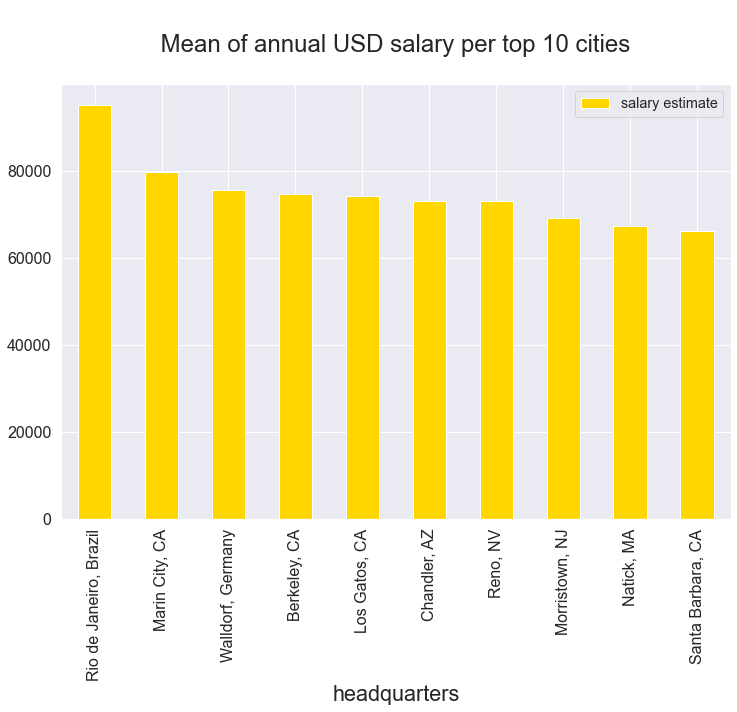

In [188]:
aggPlot('headquarters',
    i=0,
    k='mean',
    size='m',
    title='annual USD salary per top 10 cities',
    top=10,
    save=True)

In [13]:
data['monthly salary in shekels'] = data[outcome[0]].apply(lambda x : round(x*3.4/12),2)

In [183]:
len(data['monthly salary in shekels'].value_counts()) == len(data[outcome[0]].value_counts())

False

In [184]:
# the answer is false because of the round issue...  no problems expected

In [186]:
outcome.append('monthly salary in shekels')

In [187]:
outcome[1]

'monthly salary in shekels'

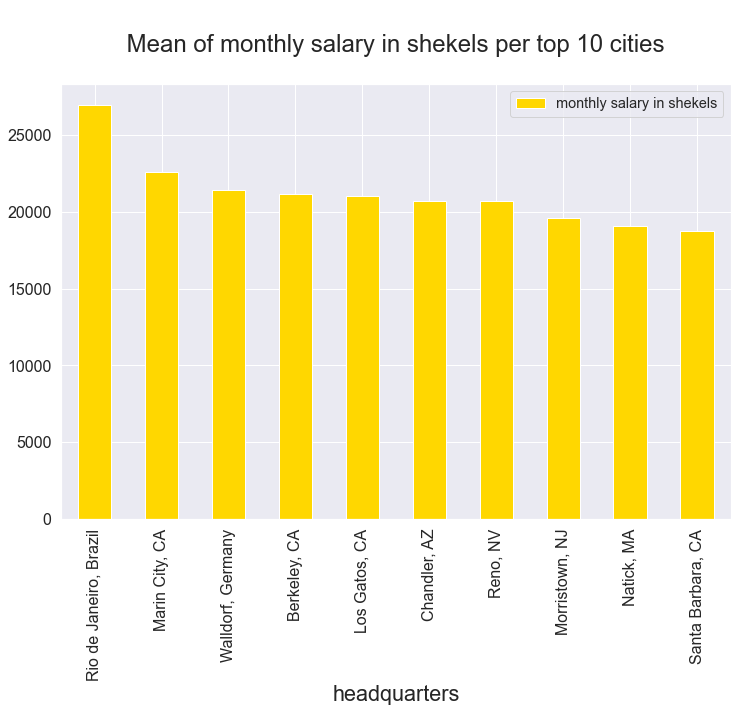

In [190]:
aggPlot('headquarters',
    i=1,  #meanning the shekels data
    k='mean',
    size='m',
    title=outcome[1]+' per top 10 cities',
    top=10,
    save=True)

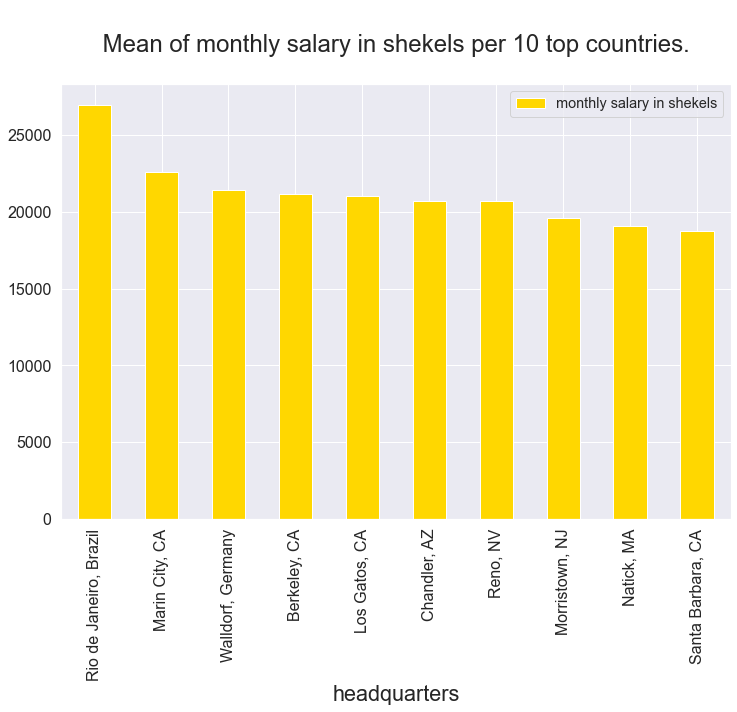

In [196]:
aggPlot('headquarters',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=10)

In [206]:
rel

['size', 'type of ownership', 'sector', 'revenue', 'easy apply']

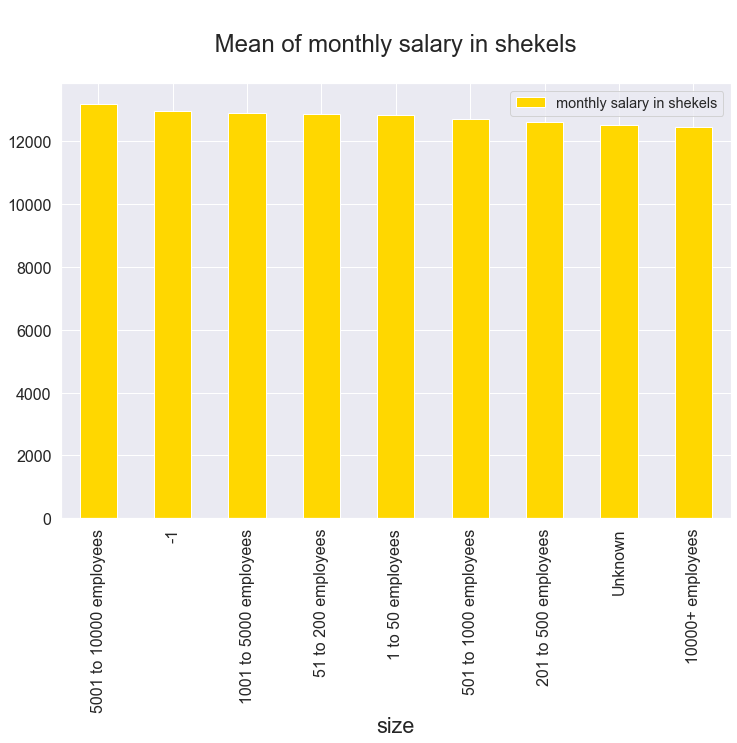

In [198]:
aggPlot('size',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=10)

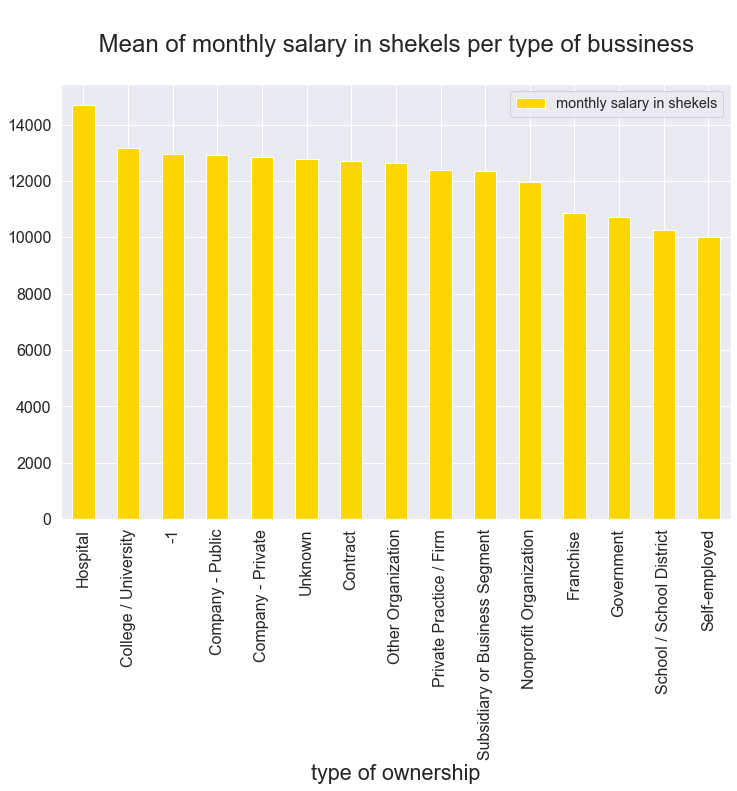

In [209]:
aggPlot('type of ownership',
    i=1,
    k='mean',
    size='m',
    title=outcome[1]+' per type of bussiness',
    top=10,save=True)

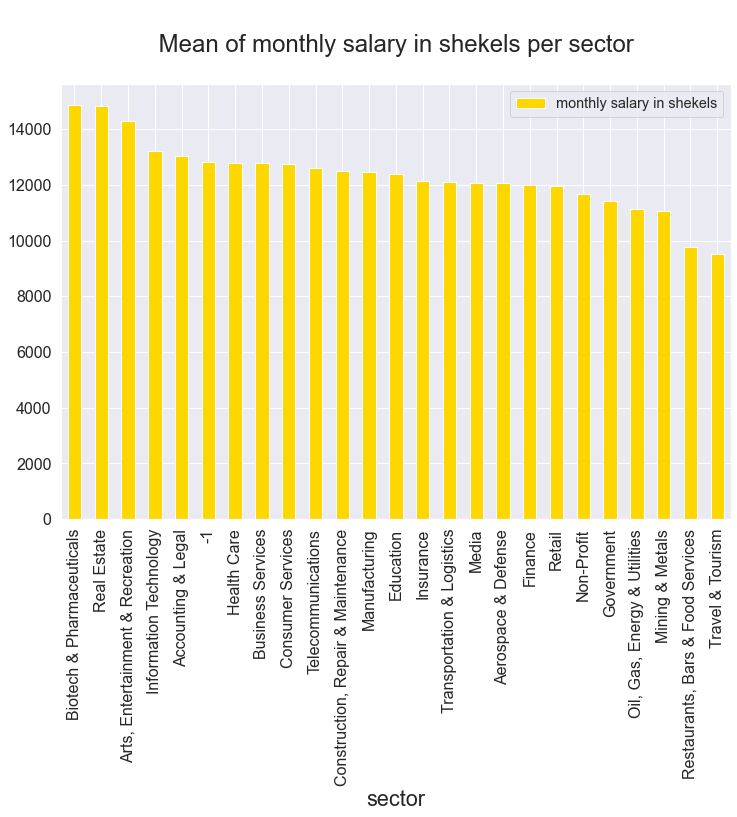

In [210]:
aggPlot('sector',
    i=1,
    k='mean',
    size='m',
    title=outcome[1]+' per sector',
    top=10,save=True)

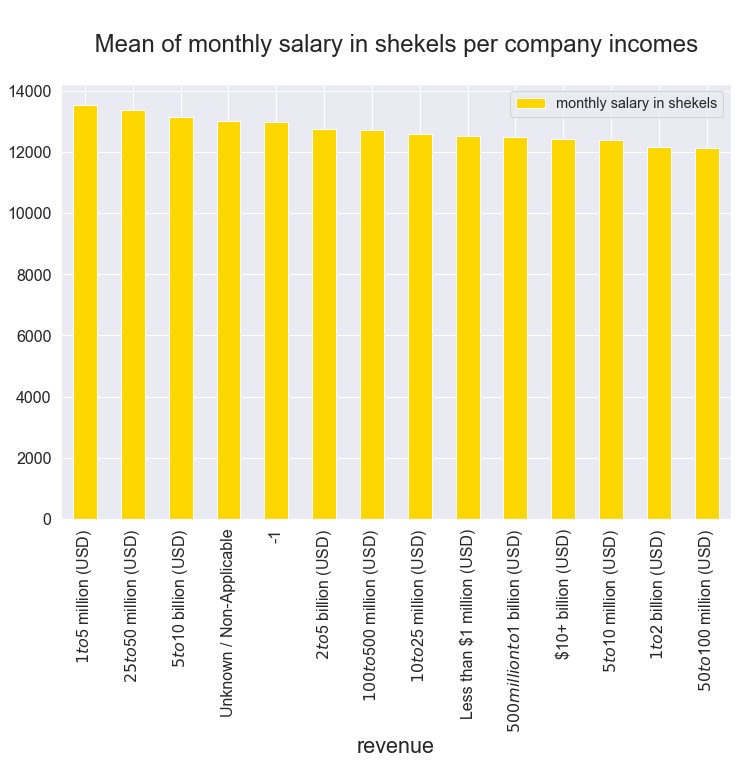

In [212]:
aggPlot('revenue',
    i=1,
    k='mean',
    size='m',
    title=outcome[1]+' per company incomes',
    top=10)

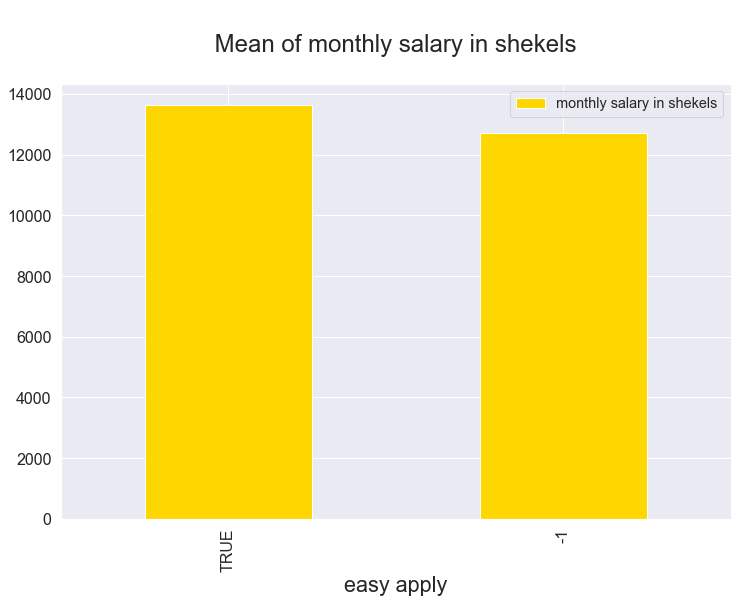

In [213]:
aggPlot('easy apply',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=10,save=True)

In [ ]:
'location', 'industry', 'competitors'

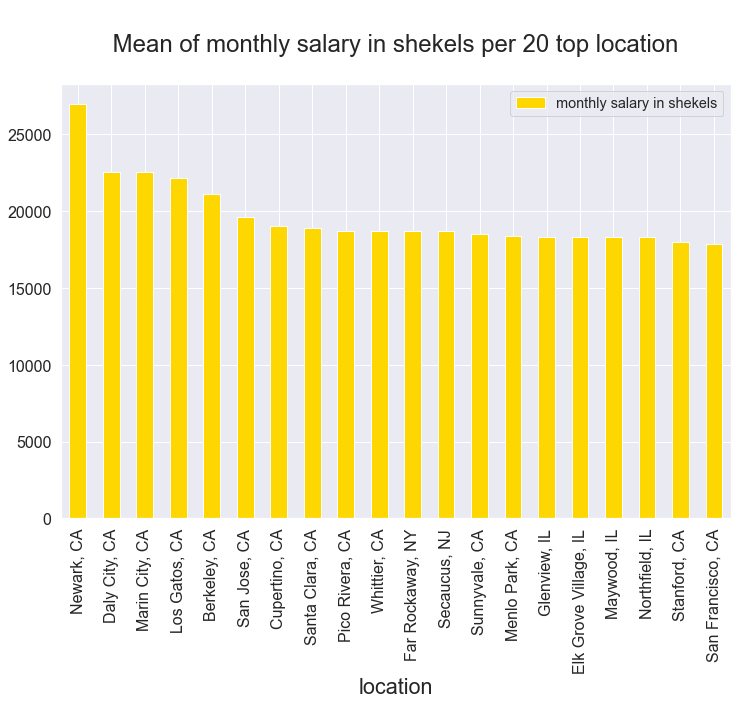

In [215]:
aggPlot('location',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=20,save=True)

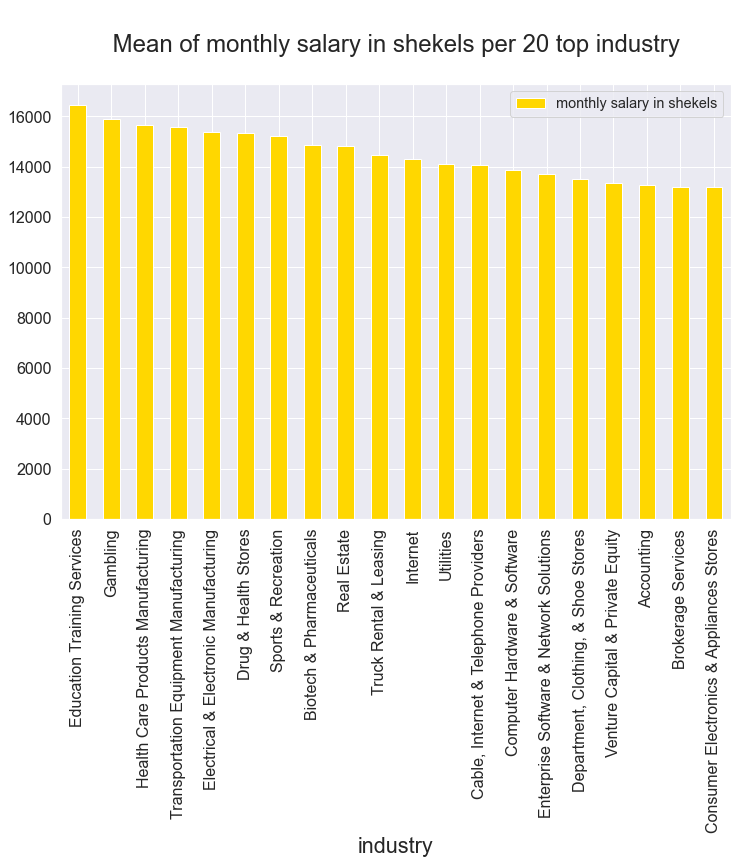

In [216]:
aggPlot('industry',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=20,save=True)

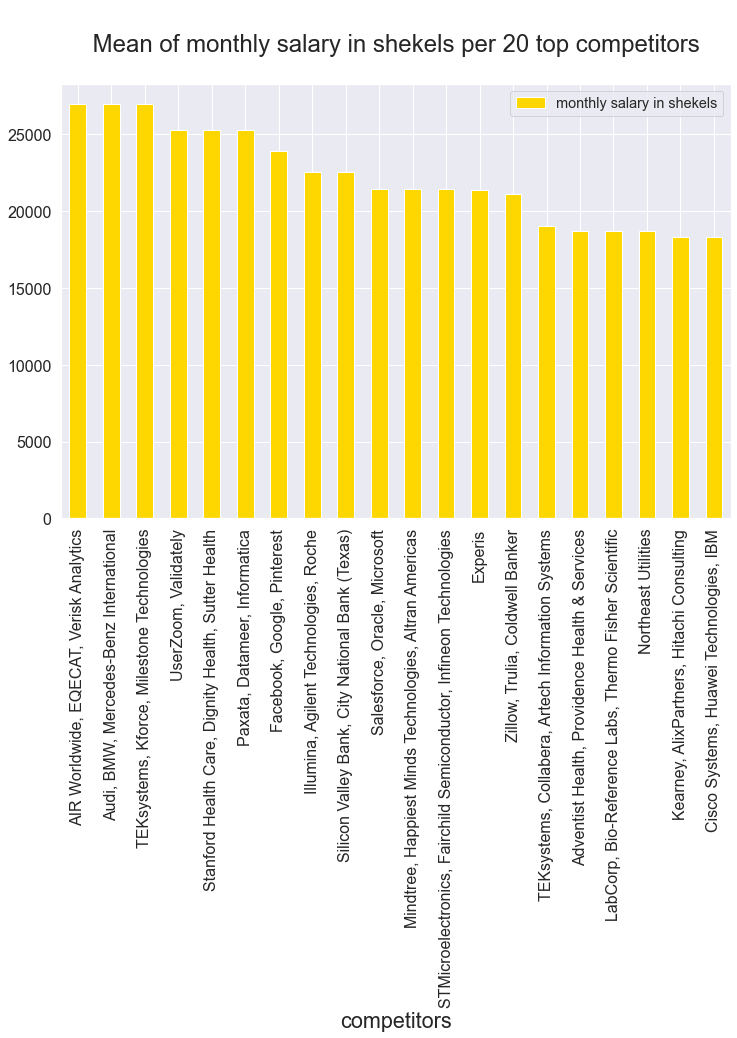

In [217]:
aggPlot('competitors',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=20,save=True)

In [218]:
unrel

['job title',
 'job description',
 'company name',
 'location',
 'headquarters',
 'industry',
 'competitors']

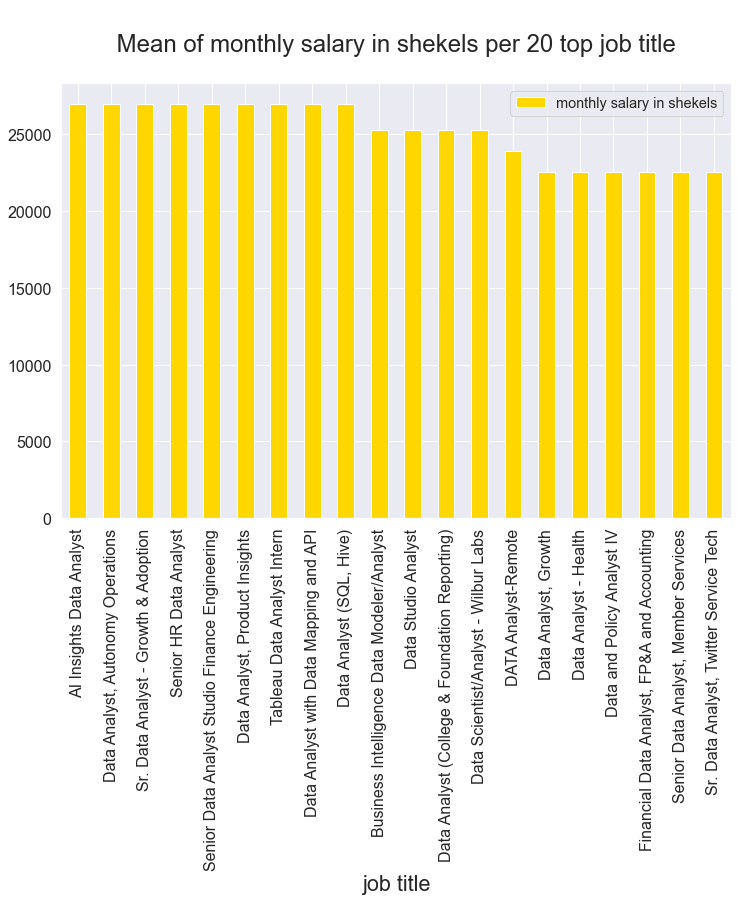

In [219]:
aggPlot('job title',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=20,save=True)

In [263]:

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

#reverse dictionary
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))


def state(head):
    
    try: 
        state = head.split()[-1]
        if state in abbrev_us_state.keys():
            return abbrev_us_state[state]
        else:
            return state 
    except:
        return ''

data['state']  = data['headquarters'].apply(state)


In [264]:
data['state']

0       New York
1       New York
2       New York
3       Virginia
4       New York
          ...   
2248     Georgia
2249    Colorado
2250          -1
2251        Ohio
2252    Colorado
Name: state, Length: 2252, dtype: object

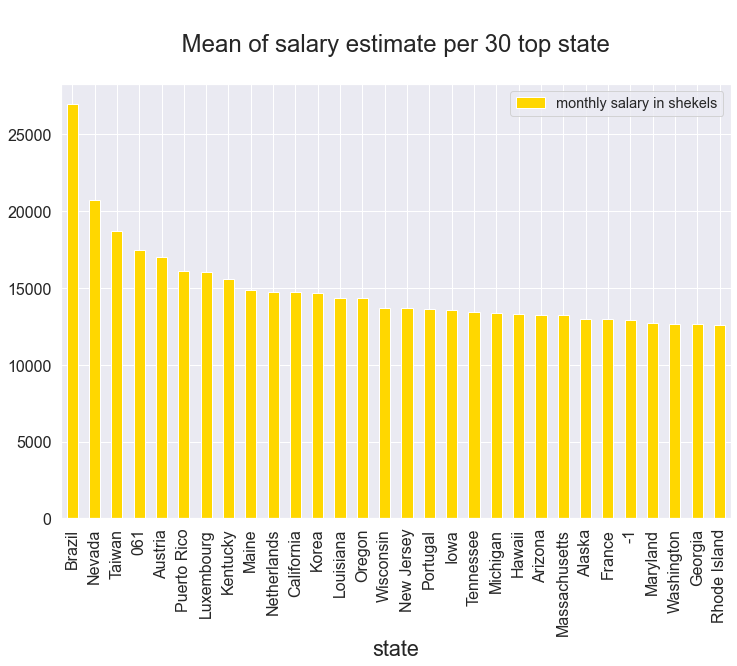

In [271]:
aggPlot('state',
    i=1,
    k='mean',
    size='m',
    title=outcome[1],
    top=30,
    save=True)

In [23]:
# here add the compute langueges in the description

computelanguages  =  """AWS,SQL,Python,R,Tableau,power BI,microsoft BI,excel,spark,jupyter notebook,pycharm,pandas,
                        java,scala,HTML,CSS,java script,javascript,JS,matlab,C++,C#,C,julia,SAS,knime,SAP,qlik,sisence,
                        scikit learn,scikit-learn,scikitlearn,scipy,numpy,matplotlib""".replace('\n','').split(',')

#to lower
computelanguages = [i.lower() for i in computelanguages]

def computeLanguage(jobDescription):
    
    demandedLanguage =[]
        
    for i in jobDescription.split():
        if i.lower() in computelanguages and i not in demandedLanguage :
            demandedLanguage.append(i)
    
    return demandedLanguage 

data['computeLanguage'] = data['job description'].apply(computeLanguage)

In [34]:
dic = {}
for i in data['computeLanguage']:
    for j in  i:
        if j not in dic:
            dic[j] = 1
        else:
            dic[j] += 1

In [46]:
df = pd.DataFrame.from_dict(dic, orient='index')

In [48]:
df = df.sort_values(ascending=False, by = df.columns[0])